Import modules 

In [182]:
#!/usr/bin/python
#import libraries
import urllib3
import certifi
import json
import pymongo
import pandas as pd



Import necessary modules for credentials to access MongoDB
File saved on personal machine with mongo connection string 
Don't save on github for security purposes

In [183]:


with open('C:/Users/SETUPUSER/Desktop/Secret/Secrets.json') as f:
    data = json.load(f)
    
    connstring = data['connstring']
print(f"My secret key is {len(connstring)} characters in length.")
    
  


My secret key is 61 characters in length.


In [184]:
# Connect to the database using known good certificates
client = pymongo.MongoClient(connstring, tlsCAFile=certifi.where())

# Fetch the database named "DA-320"
da320_database = client['DA_320']

# access to collections
allCollections = da320_database.list_collection_names()

# output the collections within my database
print(f"Using MongoDB version {client.server_info()['version']}.")
print(f"This database has the collections {allCollections}")

Using MongoDB version 5.0.14.
This database has the collections ['IMDB', 'Metacritic_Movie', 'Metacritic_Movie_1']


Retrieve mongoDB collection IMDB from Server

In [185]:
#creating cursor
cursor = da320_database["IMDB"].find()

# convert this information into a Pandas dataframe
imdb = pd.DataFrame(cursor)

# check information
imdb.head()

,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company
0,63782e3fed3f19bde22991e1,77631,Grease,110,7.2,265183,TV-14::(D),6/13/1978,6000000,60759,394955690,"Comedy, Musical, Romance","John Travolta, Olivia Newton-John, Stockard Ch...",Randal Kleiser,"Allan Carr, Neil A. Machlis, Robert Stigwood","Paramount Pictures, Robert Stigwood Organizati..."
1,63782e3fed3f19bde22991e2,78346,Superman,143,7.4,172769,TV-PG::(LV),12/10/1978,55000000,7465343,166200000,"Action, Adventure, Sci-Fi","Marlon Brando, Gene Hackman, Christopher Reeve...",Richard Donner,"Charles Greenlaw, Richard Lester, Alexander Sa...","Dovemead Films, Film Export A.G., Internationa..."
2,63782e3fed3f19bde22991e3,77416,The Deer Hunter,183,8.1,334827,R,12/8/1978,15000000,NULL,NULL,"Drama, War","Robert De Niro, John Cazale, John Savage, Chri...",Michael Cimino,"Joann Carelli, Michael Cimino, Michael Deeley,...","EMI Films, Universal Pictures"
3,63782e3fed3f19bde22991e4,77651,Halloween,91,7.7,267109,TV-14,10/25/1978,300000,NULL,70000000,"Horror, Thriller","Donald Pleasence, Jamie Lee Curtis, Nancy Kyes...",John Carpenter,"Moustapha Akkad, John Carpenter, Debra Hill, K...","Compass International Pictures, Falcon Interna..."
4,63782e3fed3f19bde22991e5,77975,National Lampoon's Animal House,109,7.4,119917,"TV-14::(DLSV, TV Rating.)",7/27/1978,3000000,201747,3371006,Comedy,"Tom Hulce, Stephen Furst, Mark Metcalf, Mary L...",John Landis,"Ivan Reitman, Matty Simmons","Universal Pictures, Oregon Film Factory, Stage..."


In [186]:
# Transform and standardize the columns

imdb.release_date=pd.to_datetime(imdb.release_date,errors = 'coerce')
imdb.budget = pd.to_numeric(imdb.budget, errors='coerce')
imdb.runtime=pd.to_numeric(imdb.runtime,errors='coerce')

# cheking result
imdb.head()

,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company
0,63782e3fed3f19bde22991e1,77631,Grease,110.0,7.2,265183,TV-14::(D),1978-06-13,6000000.0,60759,394955690,"Comedy, Musical, Romance","John Travolta, Olivia Newton-John, Stockard Ch...",Randal Kleiser,"Allan Carr, Neil A. Machlis, Robert Stigwood","Paramount Pictures, Robert Stigwood Organizati..."
1,63782e3fed3f19bde22991e2,78346,Superman,143.0,7.4,172769,TV-PG::(LV),1978-12-10,55000000.0,7465343,166200000,"Action, Adventure, Sci-Fi","Marlon Brando, Gene Hackman, Christopher Reeve...",Richard Donner,"Charles Greenlaw, Richard Lester, Alexander Sa...","Dovemead Films, Film Export A.G., Internationa..."
2,63782e3fed3f19bde22991e3,77416,The Deer Hunter,183.0,8.1,334827,R,1978-12-08,15000000.0,NULL,NULL,"Drama, War","Robert De Niro, John Cazale, John Savage, Chri...",Michael Cimino,"Joann Carelli, Michael Cimino, Michael Deeley,...","EMI Films, Universal Pictures"
3,63782e3fed3f19bde22991e4,77651,Halloween,91.0,7.7,267109,TV-14,1978-10-25,300000.0,NULL,70000000,"Horror, Thriller","Donald Pleasence, Jamie Lee Curtis, Nancy Kyes...",John Carpenter,"Moustapha Akkad, John Carpenter, Debra Hill, K...","Compass International Pictures, Falcon Interna..."
4,63782e3fed3f19bde22991e5,77975,National Lampoon's Animal House,109.0,7.4,119917,"TV-14::(DLSV, TV Rating.)",1978-07-27,3000000.0,201747,3371006,Comedy,"Tom Hulce, Stephen Furst, Mark Metcalf, Mary L...",John Landis,"Ivan Reitman, Matty Simmons","Universal Pictures, Oregon Film Factory, Stage..."


Changing the currency numbers to make analysis a little less challenging

In [187]:
from matplotlib import pyplot 

def format_currency(amount, _):
    if amount > 1_000_000_000_000:
        return f"${round(amount / 1_000_000_000_000)}T"
    elif amount > 1_000_000_000:
        return f"${round(amount / 1_000_000_000)}B"
    elif amount > 1_000_000:
        return f"${round(amount / 1_000_000)}M"
    elif amount > 1_000:
        return f"${round(amount / 1_000)}K"
    else:
        return f"${round(amount)}"


plotting runtime vs release date to find an outlier

In [197]:
cursor = da320_database["IMDB"].find({"release_date":{"$regex": r"1978" }})
year_films = pd.DataFrame(cursor)
year_films.release_date=pd.to_datetime(year_films.release_date,errors = 'coerce')
year_films.budget = pd.to_numeric(year_films.budget, errors='coerce')
year_films.runtime=pd.to_numeric(year_films.runtime,errors='coerce')
year_films.head()

,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company
0,63782e3fed3f19bde22991e1,77631,Grease,110,7.2,265183,TV-14::(D),1978-06-13,6000000.0,60759,394955690,"Comedy, Musical, Romance","John Travolta, Olivia Newton-John, Stockard Ch...",Randal Kleiser,"Allan Carr, Neil A. Machlis, Robert Stigwood","Paramount Pictures, Robert Stigwood Organizati..."
1,63782e3fed3f19bde22991e2,78346,Superman,143,7.4,172769,TV-PG::(LV),1978-12-10,55000000.0,7465343,166200000,"Action, Adventure, Sci-Fi","Marlon Brando, Gene Hackman, Christopher Reeve...",Richard Donner,"Charles Greenlaw, Richard Lester, Alexander Sa...","Dovemead Films, Film Export A.G., Internationa..."
2,63782e3fed3f19bde22991e3,77416,The Deer Hunter,183,8.1,334827,R,1978-12-08,15000000.0,NULL,NULL,"Drama, War","Robert De Niro, John Cazale, John Savage, Chri...",Michael Cimino,"Joann Carelli, Michael Cimino, Michael Deeley,...","EMI Films, Universal Pictures"
3,63782e3fed3f19bde22991e4,77651,Halloween,91,7.7,267109,TV-14,1978-10-25,300000.0,NULL,70000000,"Horror, Thriller","Donald Pleasence, Jamie Lee Curtis, Nancy Kyes...",John Carpenter,"Moustapha Akkad, John Carpenter, Debra Hill, K...","Compass International Pictures, Falcon Interna..."
4,63782e3fed3f19bde22991e5,77975,National Lampoon's Animal House,109,7.4,119917,"TV-14::(DLSV, TV Rating.)",1978-07-27,3000000.0,201747,3371006,Comedy,"Tom Hulce, Stephen Furst, Mark Metcalf, Mary L...",John Landis,"Ivan Reitman, Matty Simmons","Universal Pictures, Oregon Film Factory, Stage..."


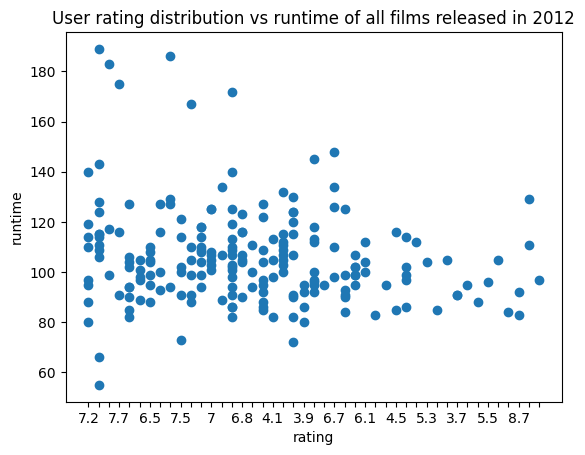

In [201]:
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import numpy

fig, ax = plt.subplots()

#scatter plot of user rating distribution vs runtime of all films realeased in 2012
plt.title('User rating distribution vs runtime of all films released in 2012')
plt.scatter(year_films['user_rating'], year_films['runtime'])
every_nth = 3
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.xlabel('rating')
plt.ylabel('runtime')
plt.show()

In [ ]:

# creating cursor fot drama genre
cursor = da320_database["IMDB"].find({"genres":{"$in": ["Drama"] }})
drama_films = pd.DataFrame(cursor)
drama_films.release_date=pd.to_datetime(drama_films.release_date,errors = 'coerce')
drama_films.budget = pd.to_numeric(drama_films.budget, errors='coerce')
drama_films.runtime=pd.to_numeric(drama_films.runtime,errors='coerce')
drama_films.head()


,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company
0,63782e3fed3f19bde22991ea,78111,Pretty Baby,110.0,6.5,10881,TV-MA,1978-01-01,NaN,NULL,NULL,Drama,"Brooke Shields, Keith Carradine, Susan Sarando...",Louis Malle,"Louis Malle, Polly Platt",Paramount Pictures
1,63782e3fed3f19bde2299225,78056,Paradise Alley,107.0,5.7,5140,PG,1978-09-22,NaN,NULL,NULL,Drama,"Sylvester Stallone, Lee Canalito, Armand Assan...",Sylvester Stallone,"Arthur Chobanian, Edward R. Pressman, John F. ...",Force Ten Productions Inc.
2,63782e3fed3f19bde2299232,77742,Interiors,92.0,7.3,19649,TV-MA::(TV rating),1978-08-02,3100000.0,NULL,1849603,Drama,"Kristin Griffith, Mary Beth Hurt, Richard Jord...",Woody Allen,"Robert Greenhut, Charles H. Joffe, Jack Rollins","Jack Rollins & Charles H. Joffe Productions, R..."
3,63782e3fed3f19bde229923a,76263,Killer of Sheep,80.0,7.2,6681,NULL,1978-11-14,100000.0,31728,456459,Drama,"Henry G. Sanders, Kaycee Moore, Charles Bracy,...",Charles Burnett,Charles Burnett,", , , ,"
4,63782e3fed3f19bde2299244,81283,Ordinary People,124.0,7.7,51757,R,1980-09-19,6000000.0,NULL,NULL,Drama,"Donald Sutherland, Mary Tyler Moore, Judd Hirs...",Robert Redford,Ronald L. Schwary,"Paramount Pictures, Wildwood Enterprises"


In [ ]:
from matplotlib import pyplot 

def format_currency(amount, _):
    if amount > 1_000_000_000_000:
        return f"${round(amount / 1_000_000_000_000)}T"
    elif amount > 1_000_000_000:
        return f"${round(amount / 1_000_000_000)}B"
    elif amount > 1_000_000:
        return f"${round(amount / 1_000_000)}M"
    elif amount > 1_000:
        return f"${round(amount / 1_000)}K"
    else:
        return f"${round(amount)}"

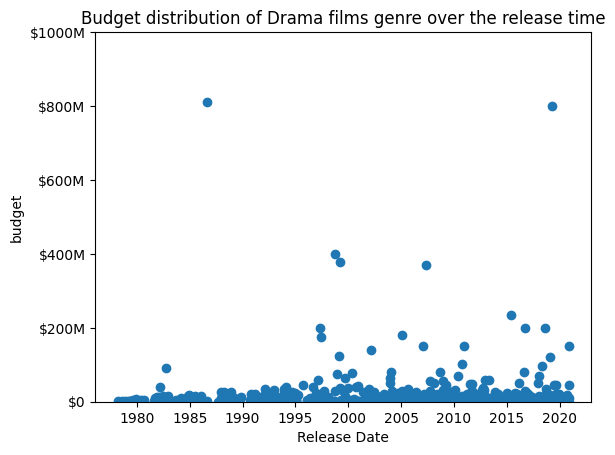

In [ ]:

fig, ax = plt.subplots()
plt.title('Budget distribution of Drama films genre over the release time')
plt.scatter(drama_films['release_date'], drama_films['budget'])
plt.ylim(0, 1_000_000_000)
# every_nth = 10
# for n, label in enumerate(ax.yaxis.get_ticklabels()):
#     if n % every_nth != 0:
#         label.set_visible(False)
# every_nth = 200
# for n, label in enumerate(ax.xaxis.get_ticklabels()):
#     if n % every_nth != 0:
#         label.set_visible(False)

plt.xlabel('Release Date')
plt.ylabel('budget')
plt.gca().yaxis.set_major_formatter(format_currency)
plt.show()


MongoDB compass aggregations

In [ ]:
# /**
#  Convert Runtime, User Rating, Votes, Budget, 
#  Opening Weekend, and Gross Sales into numbers
#  * &project stage
#  */
 
# {
#     id:"$id",
#     title:"$title",
#     runtime:{
#       $convert:{
#       input: "$runtime",
#       to: "int",
#       onError: null,
#     }
#   },
#     user_rating:{
#       $convert:{
#       input: "$user_rating",
#       to: "double",
#       onError: null,
#     }
#   },   
#     voites:{
#       $convert:{
#       input: "$voites",
#       to: "int",
#       onError: null,
#    }
#   },
#     budget:{
#       $convert:{
#       input: "$budget",
#       to: "int",
#       onError: null,
#     }
#   },
#     opening_weekend:{
#       $convert:{
#       input: "$opening_wekend",
#       to: "int",
#       onError: null,
#    }
#  },
#     gross_sales:{
#       $convert:{
#       input: "$gross_sales",
#       to: "int",
#       onError: null,
#    }
#  },
# /*
#  * Break apart the Genres, Cast, Director, 
#  * Producer, and Company fields into arrays of 